In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/emmabeamitchell/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


The first data set is about spilling incidents in New York State. The data is based on reported spills, and includes information such as location, spill type, quantity and source. The second data set is a shapefile from the Census Bureau that contains the geometry of the counties of the United States and its territories, as well as some minor geographical information like hydrology, political boundaries, and topography. 

## 3. Import libraries

In [269]:
# Import all necessary libraries
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [256]:
# Import US county shape file using `os`
fp = os.path.join('~', 'meds', 'eds-220',
                 'eds220-HW',
                 'eds220-hwk3',
                 'data', 
                 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

In [257]:
# Import Spill Incidents data
spills = pd.read_csv("data/Spill_Incidents_20241102.csv")

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [258]:
# Use `.head()` to view first five rows of dataframe
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [126]:
# Use `.dtypes` to see the data types of each column
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [270]:
# Use `.unique()` to view the unique elements in the 'Matertial Family' column
spills['Material Family'].unique()

KeyError: 'Material Family'

In [271]:
# Use `.unique()` to view the unique elements in the 'County' column
spills['County'].unique()

KeyError: 'County'

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

I used `.head()` to get a brief overview and idea of what the data looks like. Then I `.dtypes` to see what data type each column is, and using that we can decide what data types we need to change. Lastly I used `unique()` to see all the unique elements in the `Material Family` and `County` columns

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [261]:
# Print column names to see what needs to be changed
print(spills.columns, '\n')

# Clean column names into lower snake case
spills.columns = (spills.columns
                  .str.lower()
                  .str.replace(' ','_'))

# Print column names to confirm changes
print(spills.columns, '\n')

Index(['Spill Number', 'Program Facility Name', 'Street 1', 'Street 2',
       'Locality', 'County', 'ZIP Code', 'SWIS Code', 'DEC Region',
       'Spill Date', 'Received Date', 'Contributing Factor', 'Waterbody',
       'Source', 'Close Date', 'Material Name', 'Material Family', 'Quantity',
       'Units', 'Recovered'],
      dtype='object') 

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object') 



In [278]:
# Create a list of columns I need to convert
code_cols = ['spill_date', 'received_date', 'close_date']

# Use a `for` loop to to change columns into datetime objects
for column in code_cols:
    spills[column] = pd.to_datetime(spills[column])

# Check whether conversion worked
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [263]:
# Select only the petroleum data between 01-01-2023 and 10-31-2023 
petr_23 = spills[(spills.spill_date >= '2023-01-01') & (spills.spill_date <= '2023-10-31') & (spills.material_family == 'Petroleum')]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [279]:
# Assign reference variables
start_month = 1  
end_month = 10   
year_want = 2023

# Create boolean series with intended date parameters
date_within_range = (petr_23['spill_date'].dt.year == year_want) & (petr_23['spill_date'].dt.month >= start_month) & (petr_23['spill_date'].dt.month <= end_month)

# Convert boolean series into a single answer
all_dates_in_range = date_within_range.all()

# Use `fstring` to check if dates are correct
print(f"All spill dates between January and October 2023? {all_dates_in_range}")

All spill dates between January and October 2023? True


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [280]:
# Create a variable to call in `assert`
mat_fam = petr_23["material_family"].unique()

# Use `assert` to verify material family is only petroleum
for column in petr_23:
    assert mat_fam == 'Petroleum'

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [281]:
# Make a data frame with only `value_counts()` to find spills per county and reset index
spills_per_county = petr_23['county'].value_counts().reset_index()

# Add `county` and `n_spills` columns
spills_per_county.columns = ['county', 'n_spills']

# Check dataframe
spills_per_county 

,county,n_spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576
3,Orange,336
4,Queens,321
...,...,...
59,Schuyler,11
60,Hamilton,11
61,New Jersey - Region 2,6
62,Yates,6


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [268]:
# Use `.head()` to see the first 5 rows of the dataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [138]:
# Use dtypes to find the data types of each column
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [139]:
# Print crs of counties dataframe
print(counties.crs)

EPSG:4269


<Axes: >

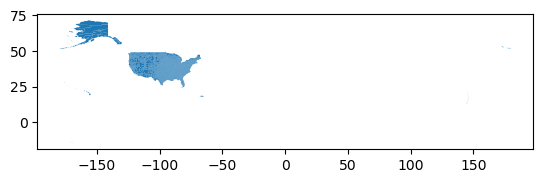

In [140]:
# Plot counties to see data geometry
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

By using `.head()` we can get a good idea of what the data frame looks like by displaying the first five rows. Using `.dtypes` we can see what data type each column is, which can be extremely helpful to see if any data types need to be changed/ don't make sense. By using `.crs` we are able to see the coordinate reference system, which is very important when combining with other geodatasets. Lastly, we plotted the data using `.plot()` to make a simple map, which gives us a good overview of the geometric elements included in the geodataset.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [141]:
# Print column names to see what needs to be simplified
print(counties.columns, '\n')

# Make column names lower snake case
counties.columns = (counties.columns
                  .str.lower())

# Print column names to confirm changes
print(counties.columns, '\n')

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object') 

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object') 



### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

In [282]:
# Select only rows with NY state fips code
ny_counties = counties[counties['statefp'] == '36']

# Plot New York counties data
ny_counties.plot()

KeyError: 'statefp'

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [143]:
# Create variable for unique names
counties_names = ny_counties['name'].unique()

# Print unique county names
print(counties_names)

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [144]:
# Create variable for unique names
county_in_spills = spills_per_county['county'].unique()

# Print unique county names
print(county_in_spills)

['Westchester' 'Suffolk' 'Nassau' 'Orange' 'Queens' 'Erie' 'Monroe'
 'Albany' 'Onondaga' 'Kings' 'New York' 'Rockland' 'Ulster' 'Saratoga'
 'Dutchess' 'Bronx' 'Putnam' 'Oneida' 'Jefferson' 'Rensselaer'
 'Washington' 'Niagara' 'Sullivan' 'Warren' 'Schenectady' 'Broome'
 'Steuben' 'Oswego' 'Ontario' 'St Lawrence' 'Montgomery' 'Columbia'
 'Livingston' 'Herkimer' 'Clinton' 'Essex' 'Chautauqua' 'Richmond'
 'Genesee' 'Cattaraugus' 'Franklin' 'Madison' 'Lewis' 'Delaware' 'Greene'
 'Wayne' 'Chenango' 'Tompkins' 'Cortland' 'Otsego' 'Schoharie' 'Fulton'
 'Chemung' 'Allegany' 'Tioga' 'Cayuga' 'Seneca' 'Wyoming' 'Orleans'
 'Schuyler' 'Hamilton' 'New Jersey - Region 2' 'Yates'
 'Tuscarora Indian Reservation']




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [145]:
# Use `setdiff1d` to view names not included in `ny_counties`
diff_names_spills = np.setdiff1d(county_in_spills,counties_names, assume_unique = True)

diff_names_spills

array(['St Lawrence', 'New Jersey - Region 2',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [146]:
# Use `setdiff1d` to view names not included in `spills_per_county`
diff_names_ny = np.setdiff1d(counties_names, county_in_spills,assume_unique = True)
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [147]:
# View number of spills in Tuscarora Indian Reservation
print(spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']['n_spills'].sum())

1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [148]:
# Find what row number 'St Lawrence' is located in
print(spills_per_county[ spills_per_county['county'] == 'St Lawrence'])

         county  n_spills
29  St Lawrence        65


In [152]:
# Use `.loc` to change name of row
spills_per_county.loc[29, 'county'] = "St. Lawrence"

# Use `assert` to confirm that the change worked
assert spills_per_county.loc[29, 'county'] == "St. Lawrence", "The county at index 29 is not 'St. Lawrence'"

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [159]:
# Rename column in `ny_counties` to match `spiller_per_county` name
ny_counties = ny_counties.rename(columns={'name': 'county'})

# Confirm the change
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'county',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [163]:
# Join both dataframes together
ny_counties = ny_counties.merge(spills_per_county, on='county', how='inner')

# Use `.head()` to confirm join
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills_x,n_spills_y
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,...,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72,72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,...,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161,161
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,...,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30,30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,...,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68,68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,...,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",161,161



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [169]:
# Find Niagara county row
ny_counties[ ny_counties['county'] == 'Niagara']

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills_x,n_spills_y
45,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,H1,G4020,...,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",88,88


In [177]:
# Add Tuscarora Indian Reservation spill to Niagrara
ny_counties.at[45, 'n_spills_x'] = 89
ny_counties.at[45, 'n_spills_y'] = 89

# Confirm addition
ny_counties.iloc[45]

statefp                                                      36
countyfp                                                    063
countyns                                               00974130
geoid                                                     36063
geoidfq                                          0500000US36063
county                                                  Niagara
namelsad                                         Niagara County
lsad                                                         06
classfp                                                      H1
mtfcc                                                     G4020
csafp                                                       160
cbsafp                                                    15380
metdivfp                                                   None
funcstat                                                      A
aland                                                1352876140
awater                                  

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



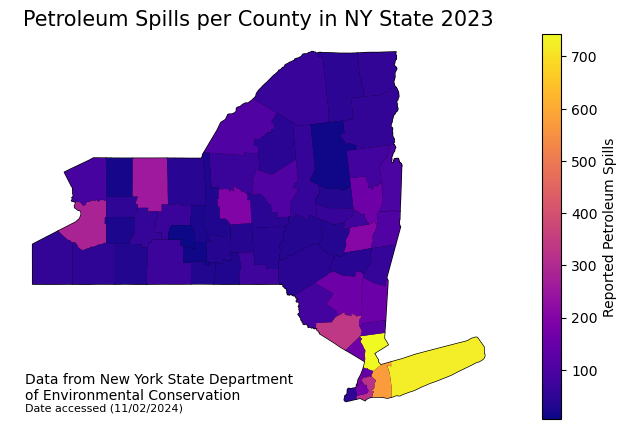

In [237]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(9, 5))

# Turn off axis
ax.axis('off')

# Plot choropleth map of petroleum spills
ax.set_title('Petroleum Spills per County in NY State 2023', fontsize=15)
ny_counties.plot(ax=ax,facecolor="none", edgecolor="black")
ny_counties.plot(ax=ax,
                 column="n_spills_x", 
                legend =True,
                  markersize=4,
                 alpha=1,
                 cmap = "plasma",
                legend_kwds={"label": "Reported Petroleum Spills", 
                             "orientation": "vertical"})
plt.annotate("Data from New York State Department\nof Environmental Conservation", xy=(-79.9,40.5), fontsize=10)
plt.annotate("Date accessed (11/02/2024)", xy=(-79.9,40.35), fontsize=8)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

The map shows the reported petroleum spills per county in NY state in 2023, made with data from the New York State Department of Environmental Conservation. The counties with the most petroleum spills in 2023 are Westchester County with 743 spills, Suffolk County with 723 spills, and Nassau County with 576 spills. 

In [253]:
# Set index to `county`
ny_counties = ny_counties.set_index('county')

In [254]:
# Use `nlargest()` to find the counties with the most spills
ny_counties['n_spills_x'].nlargest(3)

county
Westchester    743
Suffolk        723
Nassau         576
Name: n_spills_x, dtype: int64